In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Загрузка данных
data = pd.read_csv('titanic_train.csv')

In [ ]:
# 2. Вывод первых 5 строк
print("First 5 rows:")
data.head()


In [ ]:
# 2. Вывод последних 5 строк
print("Last 5 rows:")
data.tail()

In [ ]:
# 3. Основная информация о данных
print("\nDataset info:")
data.info()

In [ ]:
# 4. Описательные статистики
print("\nDescriptive statistics:")
data.describe()

In [ ]:
# 5. Замена пустых значений
data.fillna({
    'Age': data['Age'].median(),
    'Fare': data['Fare'].median()
}, inplace=True)
data.ffill(inplace=True)

In [ ]:
data.tail(5)

In [ ]:
# 6. Подсчет количества мужчин и женщин на борту
sex_counts = data['Sex'].value_counts()
print("\nКоличество мужчин и женщин на борту:")
sex_counts

In [ ]:
# 7. Распределение Pclass и распределение для мужчин/женщин
pclass_counts = data['Pclass'].value_counts()
print("\nРаспределение Pclass:")
print(pclass_counts) 
print("\nРаспределение Pclass для мужчин и женщин:")
print(data.groupby(['Sex', 'Pclass']).size())
men_2nd_class = data[(data['Sex'] == 'male') & (data['Pclass'] == 2)].shape[0]
print("\nКоличество мужчин 2-го класса:", men_2nd_class)

In [ ]:
# 8. Медиана и стандартное отклонение Fare
fare_median = round(data['Fare'].median(), 2)
fare_std = round(data['Fare'].std(), 2)
print("\nМедиана Fare:", fare_median)
print("Стандартное отклонение Fare:", fare_std)

In [ ]:
# 9. Доли выживших среди младше 30 и старше 60 лет
young_survival_rate = data[data['Age'] < 30]['Survived'].mean()
old_survival_rate = data[data['Age'] > 60]['Survived'].mean()
print("\nДоля выживших среди младше 30:", young_survival_rate)
print("Доля выживших среди старше 60:", old_survival_rate)

In [ ]:
# 10. Доли выживших среди мужчин и женщин
male_survival_rate = data[data['Sex'] == 'male']['Survived'].mean()
female_survival_rate = data[data['Sex'] == 'female']['Survived'].mean()
print("\nДоля выживших среди мужчин:", male_survival_rate)
print("Доля выживших среди женщин:", female_survival_rate)

In [ ]:
# 11. Самое популярное имя среди мужчин
# Самое популярное имя среди мужчин
male_names = data[data['Sex'] == 'male']['Name']
most_common_name = male_names.str.split(', ').str[1].str.split(' ').str[1].mode()[0] # разделяем строку по , и пробелам, ищем в ней имена и считаем частоту

name_count = male_names.str.split(', ').str[1].str.split(' ').str[1].value_counts()[most_common_name]# количество раз, когда имя встретилось
print("Самое популярное мужское имя:", most_common_name)
print("Количество повторений:", name_count)


In [ ]:
# 12. Сравнение распределения Fare и Age у спасенных и погибших
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(data[data['Survived'] == 1]['Fare'], bins=15, color='red', alpha=0.7, label='Survived')
axs[0].hist(data[data['Survived'] == 0]['Fare'], bins=15, color='blue', alpha=0.5, label='Not Survived')
axs[0].set_title("Распределение Fare для выживших и погибших")
axs[0].legend()

axs[1].hist(data[data['Survived'] == 1]['Age'], bins=20, color='red', alpha=0.7, label='Survived')
axs[1].hist(data[data['Survived'] == 0]['Age'], bins=20, color='blue', alpha=0.5, label='Not Survived')
axs[1].set_title("Распределение Age для выживших и погибших")
axs[1].legend()
plt.show()

In [ ]:
# 13. Средний возраст мужчин и женщин в зависимости от класса
age_by_class_gender = data.groupby(['Pclass', 'Sex'])['Age'].mean()
print("\nСредний возраст мужчин и женщин по классам:")
print(age_by_class_gender)

# последние два утверждения в файле задания верны

In [ ]:
# 14. Попарные зависимости признаков (scatter_matrix)
from pandas.plotting import scatter_matrix
scatter_matrix(data[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']], figsize=(15, 15), alpha=0.6)
plt.show()

In [ ]:
# 15. Гистограммы распределения каждого признака
data.hist(bins=20, figsize=(15, 10))
plt.show()

In [ ]:
# 16. Boxplot Fare по Pclass
data.boxplot(column='Fare', by='Pclass')
plt.title("Зависимость Fare от Pclass")
plt.suptitle('')
plt.show()




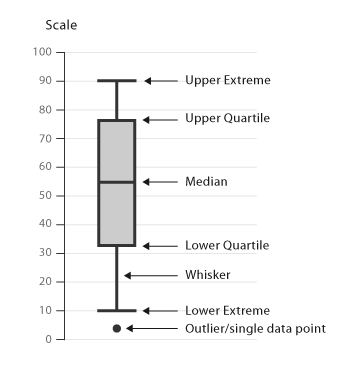

**Медиана** – это значение элемента в центре ранжированного ряда.

**Верхний квартиль** – это значение, выше которого только 25% оценок.
Нижний квартиль** – это значение, ниже которого только 25% оценок.


**Выбросы** – это нетипичные наблюдения

In [ ]:
# 17. Соотношение погибших и выживших по полу
data.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.title("Соотношение выживших и погибших по полу")
plt.show()

In [ ]:
# 18. Соотношение погибших и выживших по классу каюты
data.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.title("Соотношение выживших и погибших по Pclass")
plt.show()


In [ ]:
# 19. Выживаемость в зависимости от возраста
plt.hist(data[data['Survived'] == 1]['Age'], bins=20, color='red', alpha=0.7, label='Survived')
plt.hist(data[data['Survived'] == 0]['Age'], bins=20, color='blue', alpha=0.5, label='Not Survived')
plt.legend()
plt.title("Выживаемость в зависимости от возраста")
plt.show()

In [ ]:
# 20. График рассеяния Age и Fare для выживших и погибших
plt.figure(figsize=(10, 6))
plt.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], color='blue', label='Not Survived', alpha=0.5)
plt.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], color='red', label='Survived', alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend()
plt.title("Age vs Fare (выжившие и погибшие)")
plt.show()